In [5]:
import numpy as np
np.random.seed(5)

import matplotlib.pyplot as plt

import pandas as pd
import datetime


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


from keras.layers import Input, Dense, SimpleRNN
from keras.models import Model
from keras.optimizers import SGD
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras

In [6]:
df = pd.read_csv("consumo_electrico.csv")

In [7]:
df

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000
...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,15.766666
2075255,2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,15.733334
2075256,2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,15.633333
2075257,2010-11-26 21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0,15.566667


array([[<AxesSubplot:title={'center':'Global_active_power'}>,
        <AxesSubplot:title={'center':'Global_reactive_power'}>,
        <AxesSubplot:title={'center':'Voltage'}>],
       [<AxesSubplot:title={'center':'Global_intensity'}>,
        <AxesSubplot:title={'center':'Sub_metering_1'}>,
        <AxesSubplot:title={'center':'Sub_metering_2'}>],
       [<AxesSubplot:title={'center':'Sub_metering_3'}>,
        <AxesSubplot:title={'center':'sub_metering_4'}>, <AxesSubplot:>]],
      dtype=object)

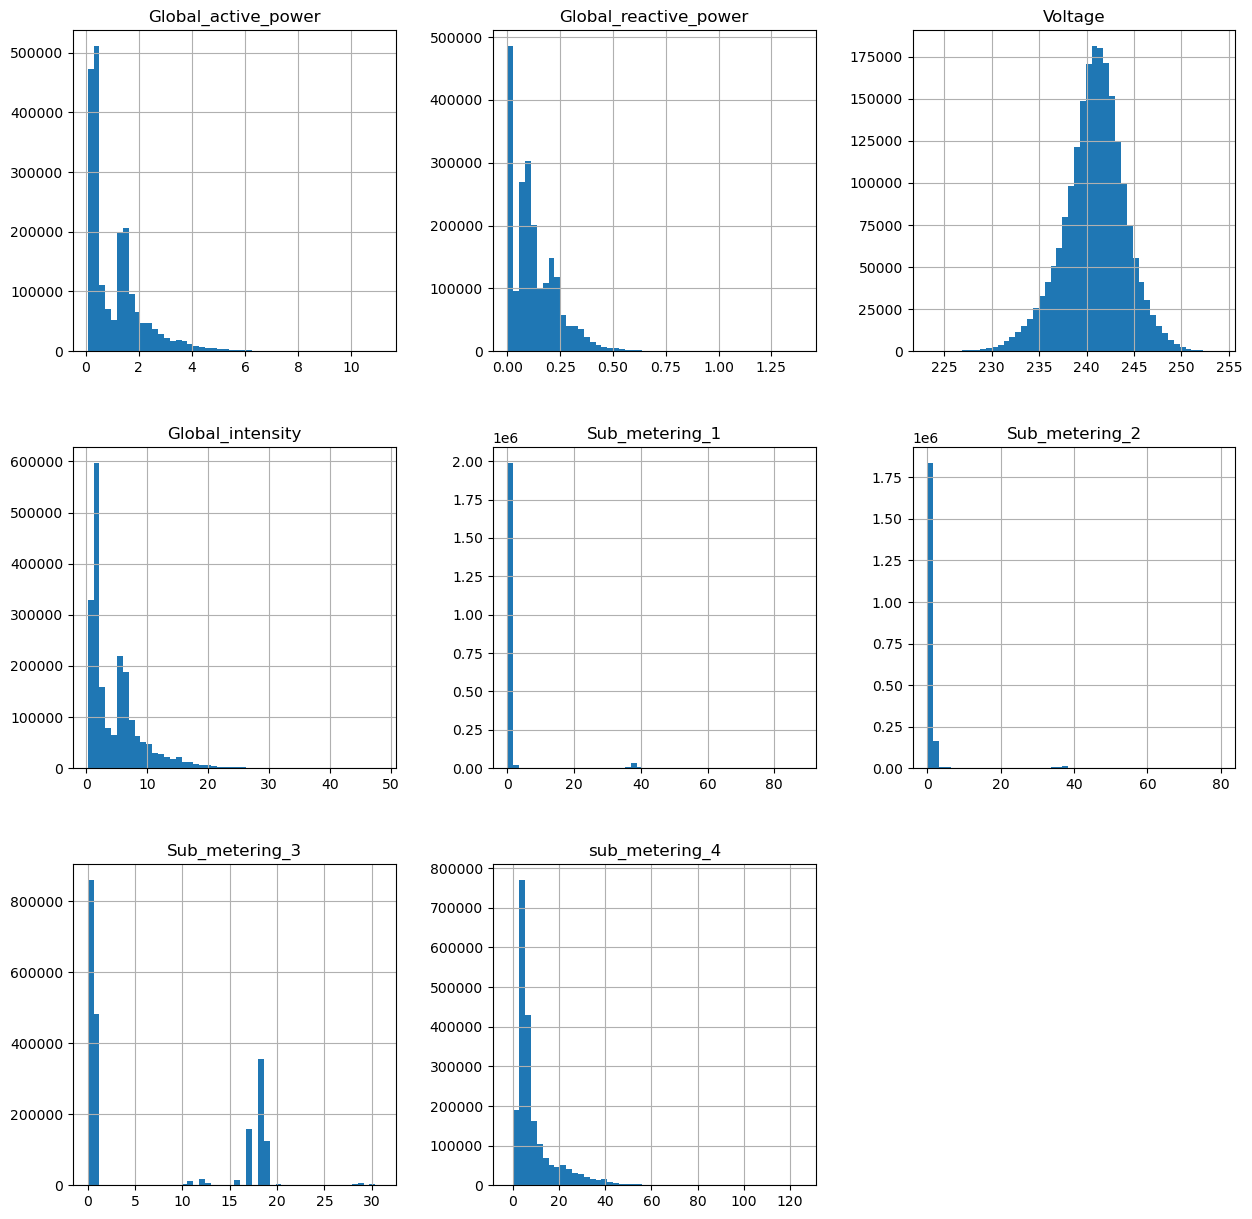

In [8]:
df.hist(bins=50,figsize=(15,15))

In [9]:
df["datetime"] = pd.to_datetime(df["datetime"])

df_horas = df.resample('H', on='datetime').mean()

df_horas2 = df_horas.rolling(20).mean().dropna()

In [10]:
corr_matrix = df.corr()
corr_matrix

C:\Users\oscar.torresrodrigue\AppData\Local\Temp\ipykernel_3628\2355143037.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
Global_active_power,1.000000,0.247088,-0.396853,0.998884,0.484110,0.434012,0.638966,0.700756
Global_reactive_power,0.247088,1.000000,-0.110802,0.266219,0.123006,0.139321,0.089949,0.211442
Voltage,-0.396853,-0.110802,1.000000,-0.408480,-0.195018,-0.165702,-0.265935,-0.269298
Global_intensity,0.998884,0.266219,-0.408480,1.000000,0.489027,0.439780,0.626952,0.702647
Sub_metering_1,0.484110,0.123006,-0.195018,0.489027,1.000000,0.054468,0.101996,0.124699
Sub_metering_2,0.434012,0.139321,-0.165702,0.439780,0.054468,1.000000,0.081440,0.084800
Sub_metering_3,0.638966,0.089949,-0.265935,0.626952,0.101996,0.081440,1.000000,0.177762
sub_metering_4,0.700756,0.211442,-0.269298,0.702647,0.124699,0.084800,0.177762,1.000000


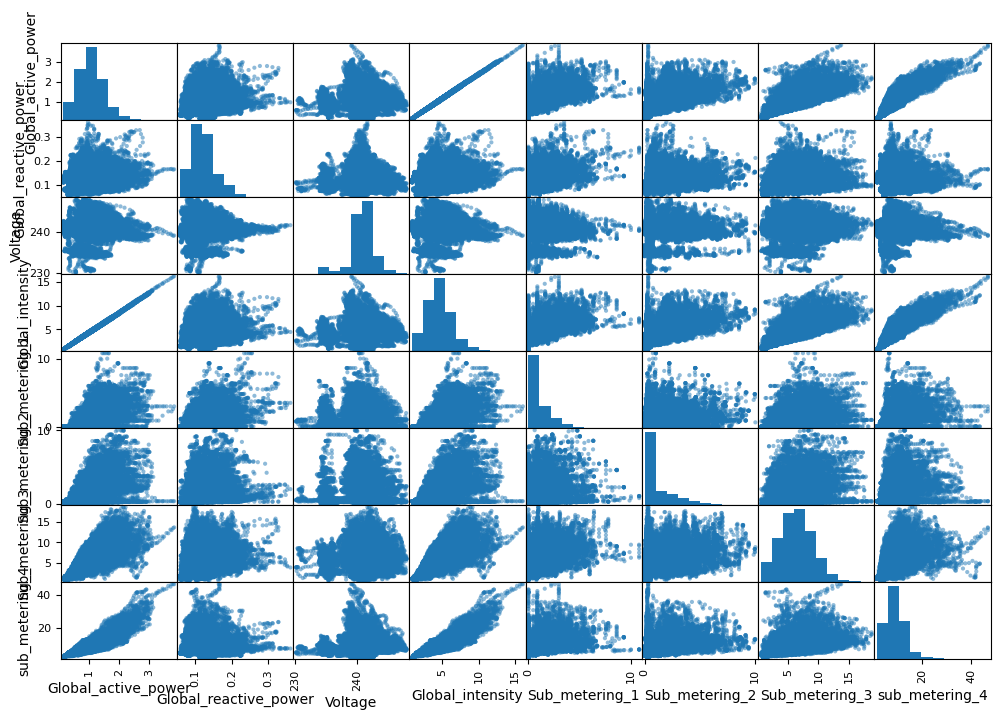

In [11]:
from pandas.plotting import scatter_matrix
matriz = scatter_matrix(df_horas2, figsize=(12,8))

Text(0, 0.5, 'Color bar')

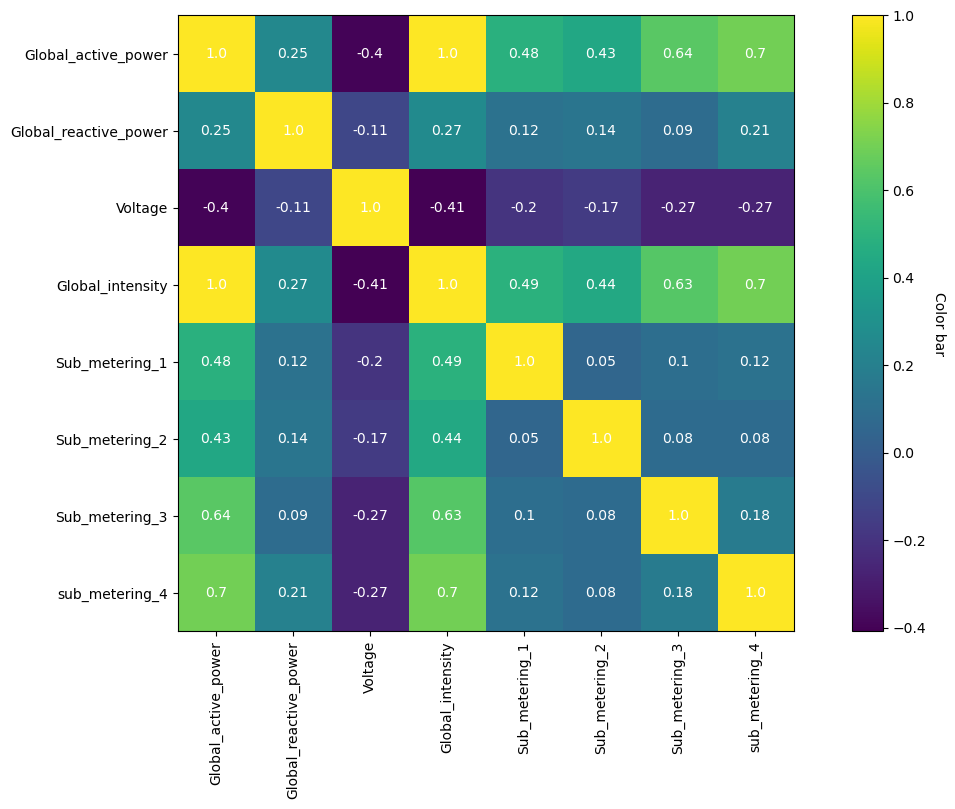

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Etiquetas
xlabs = corr_matrix.columns
ylabs = corr_matrix.index
         
# Mapa de calor
fig, ax = plt.subplots(figsize=(15,8))
im = ax.imshow(corr_matrix)

# Agregar las etiquetas
ax.set_xticks(np.arange(len(xlabs)), labels = xlabs)
ax.set_yticks(np.arange(len(ylabs)), labels = ylabs)

# Agregar los valores a cada celda
for i in range(len(xlabs)):
    for j in range(len(ylabs)):
        text = ax.text(j, i, round(corr_matrix.iloc[i, j], 2),
                       ha = "center", va = "center", color = "w")
        
# Agregar la leyenda
# cbar = fig.colorbar(im, ax=ax, label="corr")
# cbar.outline.set_visible(False)
cbar = ax.figure.colorbar(im, ax = ax)
ax.set_xticklabels(xlabs,rotation=90)
cbar.ax.set_ylabel("Color bar", rotation = -90, va = "bottom")

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)


NameError: name 'x' is not defined